<h1 align="center">Pozo de potencial finito</h1>
<div align="right">David A. Miranda, PhD<br>2023</div>

## 1. Cargar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import constants as ct
import scipy.optimize as op

## 2. Planteamiento del problema

Sea una partícula cuántica descrita por la función de onda $\psi_n(x)$ en un pozo de potencial finito con altura $U_0$. 

+ Obtenga y grafique las funciones propias para el operador hamiltoniano $\hat{H}$ del sistema.
+ Grafique los valores de energía permitidos.

## 3. Métodos y definiciones

In [2]:
a = 10   # nm -> ancho del pozo de potencial
Uo = 10   # eV -> altura del pozo de potencial
m  = ct.m_e / ct.e * 1e-18 # eV/[c^2] -> masa del electrón, con velocidad de la luz c en nm/s
hbar = ct.physical_constants['Planck constant in eV/Hz'][0]

In [3]:
def well_wavenumbers(well_width, Uo, N=10, wavefunction_type='even'):
    a = well_width
    k_critical = np.sqrt(2 * m * Uo / hbar)
    k0 = [np.pi * (n + 1) / (2*a) for n in range(4*N)]
    func = np.sin if wavefunction_type == 'odd' else np.cos
    k = op.newton(
        lambda k: np.abs(func(k*a/2)),
        k0,
        fprime=lambda k: k/k_critical,
        tol=1.e-6,
        maxiter=10000)
    if wavefunction_type == 'even':
        return k[np.tan(k*a/2)>0][0:-1:2]
    if wavefunction_type == 'odd':
        return k[np.tan(k*a/2)<0][0:-1:2]

In [4]:
def wavefunction_amplitudes(wave_number, well_width, Uo, wavefunction_type='even'):
    k = wave_number
    a = well_width
    q = k * np.tan(k * a / 2) if wavefunction_type == 'even' else - k / np.tan(k * a / 2)
    fun = np.sin
    f1 = np.exp(-q*a/2)
    f2 = 0
    if wavefunction_type == 'even':
        fun = np.cos
        f2 = np.exp(-q*a) * np.sin(k*a/2) / ( np.cos(k*a/2) )**2
    ψ1 = 0
    if f1 / q + f2 / k > 0:
        ψ1 = 1 / np.sqrt( 0.5 * ( f1 / q + f2 / k ) )
    ψ0 = ψ1 * f1 / fun(q*a/2)
    return [ψ0, ψ1]

In [5]:
def wavefunction(x, quantum_number, well_width, Uo, wavefunction_type='even'):
    n = quantum_number
    a = well_width
    k = well_wavenumbers(well_width, Uo, N=n, wavefunction_type=wavefunction_type)[n-1]
    q = k * np.tan(k * a / 2) if wavefunction_type == 'even' else k / np.tan(k * a / 2)
    E = hbar**2 * k**2 / (2 * m)
    func = np.cos if wavefunction_type == 'even' else np.sin
    ψ0, ψ1 = wavefunction_amplitudes(k, well_width, Uo, wavefunction_type=wavefunction_type)
    ψ = func( k * x )
    if E > Uo:
        return ψ, k
    ψ[np.abs(x) <= a/2] = ψ0 * func( k * x[np.abs(x) <= a/2] )
    ψ[np.abs(x) > a/2]  = ψ1 * np.exp( -np.abs(q * x[np.abs(x) > a/2]) )
    if wavefunction_type == 'odd':
        ψ[x < -a/2]  = - ψ1 * np.exp( -np.abs(q * x[x < -a/2]) )
    return ψ, k

## 4. Funciones y valores propios de $\hat{H}$

### 4.1. Solución analític

Supongamos que la energía potencial es cero dentro del pozo de potencial y $U_0$ fuera de este, entonces, el espacio se divide en dos zonas, la zona dentro del pozo, donde la energía potencial $U(x) = 0$, con hamiltoniano es $\hat{H}_0 = - \frac{\hbar^2}{2m} \frac{d^2}{dx^2}$ y la zona fuera del pozo, donde la energía $U(|x| \geq a/2) = U_0$, con hamiltoniano $\hat{H}_1 = - \frac{\hbar^2}{2m} \frac{d^2}{dx^2} + U_0$.

#### 4.1.1. Funciones propias para $\hat{H}_0$

Las funciones propias $\psi_n(x)$ del operador $\hat{H}_0$ satisfasen la ecuación $\hat{H}_0 \psi_n(x) = E_n \psi_n(x)$, donde $E_n$ son los valores propios y corresponden con la energía total permitida. Las funciones propias se encuentran al solucionar la ecuación diferencial $-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \psi_n(x) = E_n \psi_n(x)$ y corresponden con:

$$ \psi(x) = \psi_n^{(par)}(x) = \alpha_n cos(k_n x) \,\, \forall \,\, |x| \leq a/2 \qquad (1)$$
$$ \varphi(x) = \psi_{n}^{(impar)}(x) = \alpha'_{n'} sin(k_{n'} x) \,\, \forall \,\, |x| \leq a/2 \qquad (2)$$
$$ E_n = \frac{\hbar^2}{2m} k_n^2 \qquad (3)$$

#### 4.1.2. Funciones propias para $\hat{H}_1$

Hay dos posibles casos, cuando $E_n < U_0$ y cuando $E_n > U_0$.

+ **Caso 1: $E_n < U_0$**

$$ \psi_n(x) = \beta_n e^{-q|x|} \,\, \forall \,\, |x| \geq a/2 \qquad (4)$$
$$ E_n = U_0 - \frac{\hbar^2}{2m} q_n^2 \qquad (5)$$

+ **Caso 2: $E_n > U_0$**


### 4.2. Valores para los números de onda

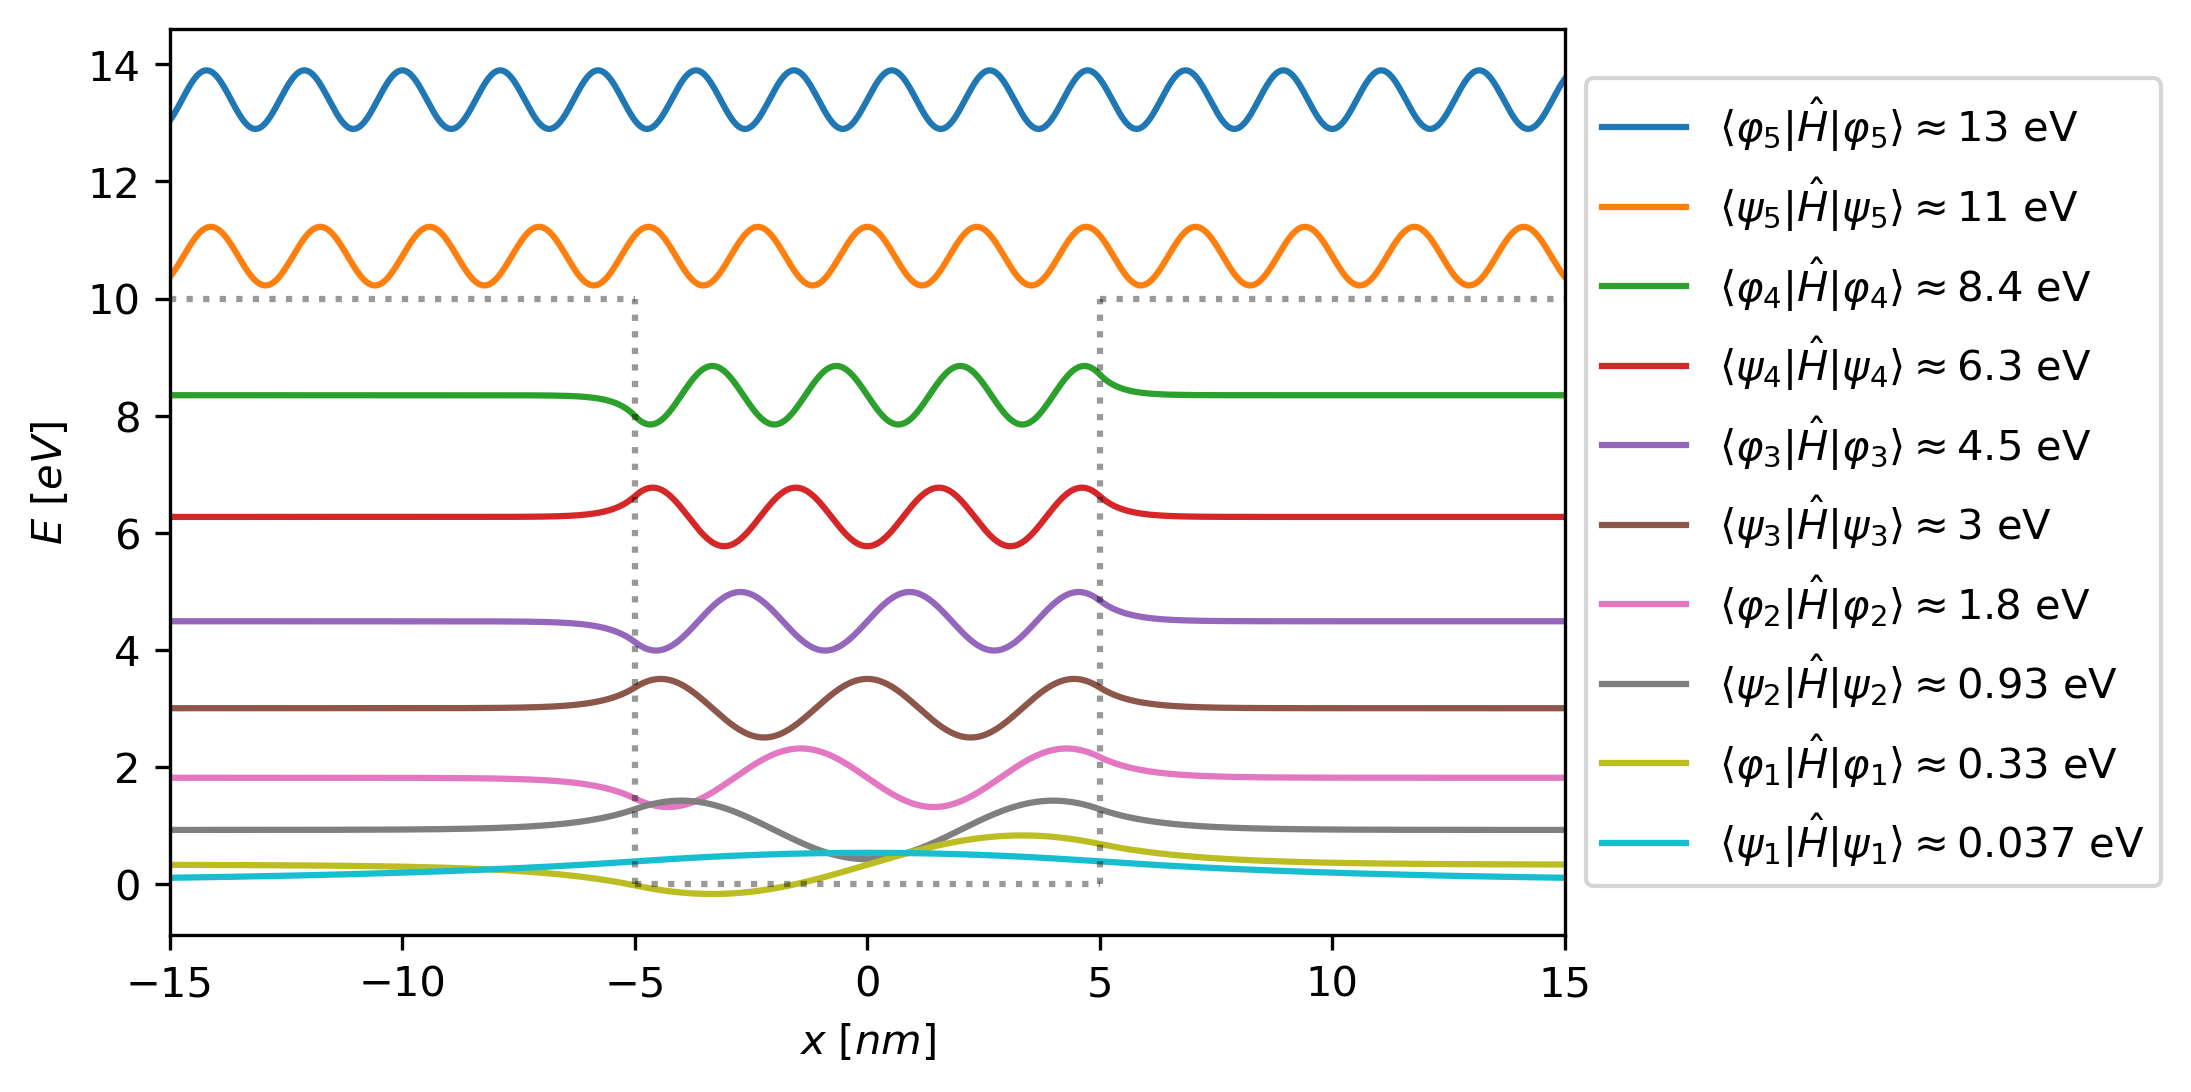

In [13]:
x = np.linspace(-1.5*a, 1.5*a, 2000)
plt.figure(dpi=300)
ψ_max = 0
for n in [5, 4, 3, 2, 1]:
    ψe, ke = wavefunction(
        x, 
        n, 
        a, 
        Uo, 
        wavefunction_type='even')
    if max(ψe) > ψ_max:
        ψ_max = max(ψe)
    ψo, ko = wavefunction(
        x, 
        n, 
        a, 
        Uo, 
        wavefunction_type='odd')
    Ee = hbar**2 * ke**2 / (2 * m)
    Eo = hbar**2 * ko**2 / (2 * m)
    ψ_max = max([max(ψe), max(ψo), ψ_max])
    plt.plot(x, Eo + ψo/max(2*ψo), label=r'$\langle \varphi_%d | \hat{H} | \varphi_%d \rangle \approx %0.2g$ eV' % (n, n, Eo))
    plt.plot(x, Ee + ψe/max(2*ψe), label=r'$\langle \psi_%d | \hat{H} | \psi_%d \rangle \approx %0.2g$ eV' % (n, n, Ee))
plt.vlines([-a/2, a/2], 0, Uo, colors='k', linestyles='dotted', alpha=0.4)
plt.hlines(0, -a/2, a/2, colors='k', linestyles='dotted', alpha=0.4)
plt.hlines(Uo, a/2, max(x), colors='k', linestyles='dotted', alpha=0.4)
plt.hlines(Uo, min(x),-a/2, colors='k', linestyles='dotted', alpha=0.4)

plt.xlim(min(x), max(x))
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.ylabel(r'$E$ $[eV]$')
_ = plt.xlabel(r'$x$ $[nm]$')

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas
5.1.1. 

En el método *well_wavenumbers* se calcula k_critical. ¿Tiene este número algún sentido físico? Argumente su respuesta.